In [1]:
folder_path=r"D:\New folder\shoes\train"

In [2]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [3]:
def get_label(folder_path):
    labels=os.listdir(folder_path)
    labels_img_dict=dict.fromkeys(labels)
    for labels in labels_img_dict.keys():
        imgs=os.listdir(os.path.join(folder_path,labels))
        images_path=[]
        for img in imgs:
            img_path=os.path.join(folder_path,labels,img)
            images_path.append(img_path)
        labels_img_dict[labels]=images_path
    return labels_img_dict

In [4]:
img_dict=get_label(folder_path)

In [5]:
img_df=pd.DataFrame(img_dict)
img_df.head()

,adidas,converse,nike
0,D:\New folder\shoes\train\adidas\100.jpg,D:\New folder\shoes\train\converse\100.jpg,D:\New folder\shoes\train\nike\100.jpg
1,D:\New folder\shoes\train\adidas\101.jpg,D:\New folder\shoes\train\converse\101.jpg,D:\New folder\shoes\train\nike\101.jpg
2,D:\New folder\shoes\train\adidas\102.jpg,D:\New folder\shoes\train\converse\102.jpg,D:\New folder\shoes\train\nike\102.jpg
3,D:\New folder\shoes\train\adidas\103.jpg,D:\New folder\shoes\train\converse\103.jpg,D:\New folder\shoes\train\nike\103.jpg
4,D:\New folder\shoes\train\adidas\104.jpg,D:\New folder\shoes\train\converse\104.jpg,D:\New folder\shoes\train\nike\104.jpg


In [6]:
img_df.to_csv('images_path_df.csv',index=False)

In [7]:
img_df.head()

,adidas,converse,nike
0,D:\New folder\shoes\train\adidas\100.jpg,D:\New folder\shoes\train\converse\100.jpg,D:\New folder\shoes\train\nike\100.jpg
1,D:\New folder\shoes\train\adidas\101.jpg,D:\New folder\shoes\train\converse\101.jpg,D:\New folder\shoes\train\nike\101.jpg
2,D:\New folder\shoes\train\adidas\102.jpg,D:\New folder\shoes\train\converse\102.jpg,D:\New folder\shoes\train\nike\102.jpg
3,D:\New folder\shoes\train\adidas\103.jpg,D:\New folder\shoes\train\converse\103.jpg,D:\New folder\shoes\train\nike\103.jpg
4,D:\New folder\shoes\train\adidas\104.jpg,D:\New folder\shoes\train\converse\104.jpg,D:\New folder\shoes\train\nike\104.jpg


In [8]:
def image_process(img):
    img_pil=Image.open(img)
    img_arr=np.array(img_pil)
    img_flat=img_arr.flatten()
    df_t=pd.DataFrame(img_flat).T
    return df_t

In [9]:
cols=img_df.columns

In [10]:
df_k = pd.DataFrame()

In [11]:
import numpy as np

In [12]:
for label in cols:
    images=img_df[label]
    for image in images:
        df_x=image_process(image)
        df_x['shoes']=label
        df_k=pd.concat([df_k,df_x])


In [13]:
df_k.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [14]:
df_k.shoes.unique()

array(['adidas', 'converse', 'nike'], dtype=object)

In [15]:
df_k.to_csv('image_array_kathford.csv',index=False)

In [16]:
data=df_k.copy()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [17]:
X=data.drop('shoes',axis=1)
y=data['shoes']

In [18]:
data=pd.read_csv('image_array_kathford.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
1,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
3,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
4,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model_dict={
    'lr_model': LogisticRegression(),
    'svc_model': SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()
}

In [21]:
X=data.drop('shoes',axis=1)
y=data.shoes

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acs_s=[]

In [27]:
for name,model in model_dict.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    ac= accuracy_score(y_test,y_pred)
    acs_s.append(ac)


d:\New Folder\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


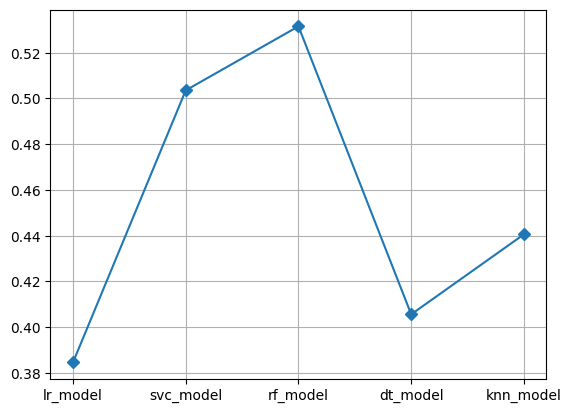

In [28]:
plt.plot(model_dict.keys(),acs_s ,marker='D')
plt.grid()

In [29]:
svc_m=SVC()

In [30]:
svc_m .fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
joblib.dump(svc_m, 'model.kathford.pt')

['model.kathford.pt']